### Import all the neccessary Libraries and packages 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
import logging 
import random 
from collections import defaultdict
import math
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import scipy.cluster.hierarchy as sch
import sys


warnings.filterwarnings('ignore')
%matplotlib inline 

### Read the spiral dataset and display it using Pandas library function

In [2]:
spiralData = pd.read_csv("spiral-dataset.csv", delimiter ='\t', header = None, names = ['X','Y','Cluster_Number'])
pd.set_option('display.max_columns', None)
display(spiralData.head())

,X,Y,Cluster_Number
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


####  Generate plot for the spiral dataset from the given values in the database

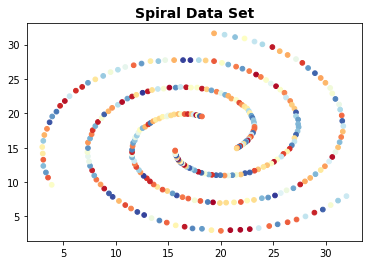

In [3]:
x = spiralData['X'].values
y = spiralData['Y'].values
spiral_dataValues = np.array(list(zip(x,y)))
colors = np.random.rand(len(spiral_dataValues))
plt.scatter(x,y, c=colors, s = 22,cmap = 'RdYlBu', alpha = 1)
plt.title('Spiral Data Set', fontsize=14, fontweight='bold')
plt.show()

####  Implement K- Means Algorithm from scratch

In [4]:
class KMeansAlgorithm(object):

    def __init__(self, spiralDataset, numb_clusters, numb_centroidInit,numb_Itern):

        self.spiraldata = spiralDataset
        self.numb_clusters = numb_clusters
        self.numb_instances, self.numb_features = self.spiraldata.shape
        self.numb_centroidInit = numb_centroidInit
        self.ssd_values = []
        self.numb_Itern = numb_Itern
        self.clusteredList = []  

    # Funtion to compute the distance B/W points in space:-
    @staticmethod
    def compute_Distance(ndArray1, ndArray2):
        
        # Normalized Euclidean Distance
        return np.linalg.norm(ndArray1 - ndArray2)
    
    # Function to compute Initial Centroids:-
    def compute_initialCentroids(self):
        # Data from spiral data set is used as Initial Centroids
        index = random.sample(range(0, self.numb_instances), self.numb_clusters)
        initialCentroids = self.spiraldata[index]
       
        return initialCentroids
    
    # Function to allocate the data points to nearest centroid:-
    def clusterformation(self, Centroids):
        
        first_ClusterFormed = defaultdict(list)
        
        for spiralData_value in self.spiraldata:
            
            EuclideanDistances = []
            
            for centVal in Centroids:
                
                distant = self.compute_Distance(centVal, spiralData_value)
                
                EuclideanDistances.append(distant)
                
            nearestCentroid_index = np.argmin(EuclideanDistances)
            nearest_centroid = tuple(Centroids[nearestCentroid_index])
            
            print("Spiral Data: {} is nearest to Centroid: {}".format(spiralData_value, centVal))
            print("Spiral Data: {} is now part of Cluster which has centroid {}".format(spiralData_value, centVal))
            
            first_ClusterFormed[nearest_centroid].append(spiralData_value)
        
        print("After one iteration, Clusters = {0}".format(first_ClusterFormed))
        return first_ClusterFormed

    # Perform KMeans Function untill the Centroids don't change or End of Iteration:-
    def performKmean(self, init_itrn):

        centroids_value = self.compute_initialCentroids()
        print("Initial centroids: {}".format(centroids_value))
        self.clusteredList.append([])  

        for itern in range(1, self.numb_Itern+1):
            
            print("\n___________________________________________\n")
            print("\nIteration No: {}!!!!!!".format(itern))
            print("\n___________________________________________\n")
            
            first_cluster_formed = self.clusterformation(Centroids = centroids_value)
            self.clusteredList[init_itrn].append(first_cluster_formed)
            newCentroids = []
            # Compute new centroids:-
            for centValue in first_cluster_formed:
                clusteredData = first_cluster_formed[centValue]
                newCentroid = np.mean(clusteredData, axis=0)
                print("New centroid is @: {}!!!!!!!!!".format(newCentroid))
                newCentroids.append(newCentroid)
            
            # Testing whether we have to end clustering or not:-
            if self.compute_Distance(np.array(newCentroids), centroids_value) == 0:
                print("\n*************************************************\n")
                print("New centroids = Previous Centroids !!!!!!!!")
                print("Converged!!!!! Stopping the process of clustering!!!!")
                print("\n*****************************************************\n")
                break
            centroids_value = newCentroids
        return None
    
    # Fit or implement our algorithm:-
    def processKmeansAlgorithm(self):

        for init_itrn in range(self.numb_centroidInit):
            self.performKmean(init_itrn = init_itrn)
            ssd_of_finalCluster = self.SSD_Euclidean(self.clusteredList[init_itrn][-1])
            self.ssd_values.append(ssd_of_finalCluster)
        return None
    
    # Compute Sum of Squared Distance of spiral data to the corresponding centroids:-
    def SSD_Euclidean(self, clusters):

        sum_squared_distance = 0
        print("Clusters->{}".format(clusters))
        for centValue, clusterValues in clusters.items():
            print("Cluster Centroid is @: {}".format(centValue))
            print("Computing Sum of Squares from centroid to all data in that cluster!!!!")
            for clusterValue in clusterValues:
                normalized_EuclideanDistance = self.compute_Distance(clusterValue, centValue)
                squaredDistance = normalized_EuclideanDistance**2
                print("Squared Euclidean Distance from centroid {} to point {} is {}".format(centValue, clusterValue,squaredDistance))
                sum_squared_distance += squaredDistance
        print("SSD = {}".format(sum_squared_distance))
        return sum_squared_distance
    
    # Function to compute the index of the shortest distance:-
    def shortest_SSD_indexvalue(self):

        shortest_ssd = min(self.ssd_values)
        print("Shortest SSD = {}".format(shortest_ssd))
        shortest_SSD_indexvalue = self.ssd_values.index(shortest_ssd)
        print("Shortest SSD is @ Index  {}".format(shortest_SSD_indexvalue))
        return shortest_SSD_indexvalue
    
    # Function to return the final cluster:-
    def ultimate_cluster(self):
        return self.clusteredList[self.shortest_SSD_indexvalue()][-1]
    
    # Function to return the final centroids:-
    def ultimate_centroids(self):
        return list(self.ultimate_cluster().keys())
    
    # Function to plot the Ulitmate Cluster:-
    @staticmethod
    def plotting_ultimateCluster(ultimateclusters):
        c = 0
        colors = [ 'red', 'blue', 'green', 'black', 'purple','magenta', 'orange', 'yellow','cyan']
        
        for centerValue,clustValues in ultimateclusters.items():
            color = colors[c]
            i,j = 0, 1
            plt.scatter(centerValue[i], centerValue[j], color=color, s=390, alpha=1.0)
            xaxis_values = [clusterValue[i] for clusterValue in clustValues]
            yaxis_values = [clusterValue[j] for clusterValue in clustValues]
            plt.scatter(xaxis_values, yaxis_values, color=color, s=75, marker='*')
            c += 1
        plt.title("Clustered Spiral Data",fontdict= {'fontsize':20,'fontweight':5})
        plt.show()
        return None
    
    # Function to return the cluster to which a new point belongs to:-
    def predictCluster(self, ndArray):

        nearest_centroid = np.inf
        for centValue in self.ultimate_centroids():
            distance = self.compute_Distance(centValue,ndArray)
            if distance < nearest_centroid:
                nearest_centroid = centroid
        return nearest_centroid

In [5]:
# Create an Object to the class and call the function:-
# We are using 3 clusters and our X and Y values of our spiral data set
Kmeans = KMeansAlgorithm(spiralDataset=spiral_dataValues, numb_clusters=3, numb_centroidInit=1, numb_Itern = 1)
Kmeans.processKmeansAlgorithm()

Initial centroids: [[26.75 15.35]
 [31.5  19.7 ]
 [12.   16.75]]

___________________________________________


Iteration No: 1!!!!!!

___________________________________________

Spiral Data: [31.95  7.95] is nearest to Centroid: [12.   16.75]
Spiral Data: [31.95  7.95] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [31.15  7.3 ] is nearest to Centroid: [12.   16.75]
Spiral Data: [31.15  7.3 ] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [30.45  6.65] is nearest to Centroid: [12.   16.75]
Spiral Data: [30.45  6.65] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [29.7  6. ] is nearest to Centroid: [12.   16.75]
Spiral Data: [29.7  6. ] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [28.9   5.55] is nearest to Centroid: [12.   16.75]
Spiral Data: [28.9   5.55] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [28.05  5.  ] is nearest to Centroid: [12.   16.75]
Spiral Data: [28.05

Spiral Data: [23.1  17.45] is nearest to Centroid: [12.   16.75]
Spiral Data: [23.1  17.45] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [23.05 17.15] is nearest to Centroid: [12.   16.75]
Spiral Data: [23.05 17.15] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [22.9 16.9] is nearest to Centroid: [12.   16.75]
Spiral Data: [22.9 16.9] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [22.85 16.6 ] is nearest to Centroid: [12.   16.75]
Spiral Data: [22.85 16.6 ] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [22.7 16.4] is nearest to Centroid: [12.   16.75]
Spiral Data: [22.7 16.4] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [22.6 16.2] is nearest to Centroid: [12.   16.75]
Spiral Data: [22.6 16.2] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [22.55 16.05] is nearest to Centroid: [12.   16.75]
Spiral Data: [22.55 16.05] is now part of Cluster which has

Spiral Data: [ 3.  15.1] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 3.  15.1] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [ 3.1 16. ] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 3.1 16. ] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [ 3.2  16.85] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 3.2  16.85] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [ 3.45 17.75] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 3.45 17.75] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [ 3.7 18.7] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 3.7 18.7] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [ 3.95 19.55] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 3.95 19.55] is now part of Cluster which has centroid [12.   16.75]
Spiral Data: [ 4.35 20.25] is nearest to Centroid: [12.   16.75]
Spiral Data: [ 4.35 20.25] is now part of Cluster which has

Clusters->defaultdict(<class 'list'>, {(26.75, 15.35): [array([31.95,  7.95]), array([31.15,  7.3 ]), array([30.45,  6.65]), array([29.7,  6. ]), array([28.9 ,  5.55]), array([28.05,  5.  ]), array([27.2 ,  4.55]), array([26.35,  4.15]), array([25.4 ,  3.85]), array([24.6,  3.6]), array([23.6,  3.3]), array([22.75,  3.15]), array([21.85,  3.05]), array([20.9,  3. ]), array([20. ,  2.9]), array([19.1,  3. ]), array([18.2,  3.2]), array([20.4, 22.7]), array([20.7 , 22.55]), array([21.  , 22.15]), array([21.45, 21.95]), array([21.75, 21.55]), array([22.  , 21.25]), array([22.25, 21.  ]), array([22.5, 20.7]), array([22.65, 20.35]), array([22.75, 20.05]), array([22.9 , 19.65]), array([23.  , 19.35]), array([23.1, 19. ]), array([23.15, 18.65]), array([23.2 , 18.25]), array([23.2 , 18.05]), array([23.2, 17.8]), array([23.1 , 17.45]), array([23.05, 17.15]), array([22.9, 16.9]), array([22.85, 16.6 ]), array([22.7, 16.4]), array([22.6, 16.2]), array([22.55, 16.05]), array([22.4 , 15.95]), array(

In [6]:
# Sum of Squared Distance = Sum of Squared Error:-
print("Sum of squared Distance or error:", Kmeans.ssd_values)

Sum of squared Distance or error: [18871.347499999978]


In [7]:
print("Minimum SSD is at centroid Initilization:", Kmeans.shortest_SSD_indexvalue())

Shortest SSD = 18871.347499999978
Shortest SSD is @ Index  0
Minimum SSD is at centroid Initilization: 0


In [8]:
print("\n\n****Ultimate Clusters are*******:\n\n", Kmeans.ultimate_cluster())

Shortest SSD = 18871.347499999978
Shortest SSD is @ Index  0


****Ultimate Clusters are*******:

 defaultdict(<class 'list'>, {(26.75, 15.35): [array([31.95,  7.95]), array([31.15,  7.3 ]), array([30.45,  6.65]), array([29.7,  6. ]), array([28.9 ,  5.55]), array([28.05,  5.  ]), array([27.2 ,  4.55]), array([26.35,  4.15]), array([25.4 ,  3.85]), array([24.6,  3.6]), array([23.6,  3.3]), array([22.75,  3.15]), array([21.85,  3.05]), array([20.9,  3. ]), array([20. ,  2.9]), array([19.1,  3. ]), array([18.2,  3.2]), array([20.4, 22.7]), array([20.7 , 22.55]), array([21.  , 22.15]), array([21.45, 21.95]), array([21.75, 21.55]), array([22.  , 21.25]), array([22.25, 21.  ]), array([22.5, 20.7]), array([22.65, 20.35]), array([22.75, 20.05]), array([22.9 , 19.65]), array([23.  , 19.35]), array([23.1, 19. ]), array([23.15, 18.65]), array([23.2 , 18.25]), array([23.2 , 18.05]), array([23.2, 17.8]), array([23.1 , 17.45]), array([23.05, 17.15]), array([22.9, 16.9]), array([22.85, 16.6 ]), array

In [9]:
print("\n\n******Ultimate Centroids are:******\n\n",Kmeans.ultimate_centroids())

Shortest SSD = 18871.347499999978
Shortest SSD is @ Index  0


******Ultimate Centroids are:******

 [(26.75, 15.35), (31.5, 19.7), (12.0, 16.75)]


In [10]:
# Create an Object to the class and call the function:-
# We are using 3 clusters and our X and Y values of our spiral data set
# Running KMeans Algorithm 9times:-

Kmeans = KMeansAlgorithm(spiralDataset=spiral_dataValues, numb_clusters=3, numb_centroidInit=1, numb_Itern = 9)
Kmeans.processKmeansAlgorithm()

Initial centroids: [[16.7  23.8 ]
 [13.3  18.6 ]
 [13.25 10.1 ]]

___________________________________________


Iteration No: 1!!!!!!

___________________________________________

Spiral Data: [31.95  7.95] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [31.95  7.95] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [31.15  7.3 ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [31.15  7.3 ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [30.45  6.65] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [30.45  6.65] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [29.7  6. ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [29.7  6. ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [28.9   5.55] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [28.9   5.55] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [28.05  5.  ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [28.05

Spiral Data: [23.   19.35] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.   19.35] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.1 19. ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.1 19. ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.15 18.65] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.15 18.65] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.2  18.25] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.2  18.25] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.2  18.05] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.2  18.05] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.2 17.8] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.2 17.8] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.1  17.45] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [23.1  17.45] is now part of Cluster which

Spiral Data: [18.2  19.55] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [18.2  19.55] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [3.9 9.6] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [3.9 9.6] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [ 3.55 10.65] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [ 3.55 10.65] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [ 3.35 11.4 ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [ 3.35 11.4 ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [ 3.1  12.35] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [ 3.1  12.35] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [ 3.1  13.25] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [ 3.1  13.25] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [ 3.05 14.15] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [ 3.05 14.15] is now part of Cluster which

Spiral Data: [25.95 14.1 ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [25.75 13.7 ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [25.75 13.7 ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [25.35 13.3 ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [25.35 13.3 ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [25.05 12.95] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [25.05 12.95] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [24.8 12.7] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [24.8 12.7] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [24.4  12.45] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [24.4  12.45] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [24.05 12.2 ] is nearest to Centroid: [13.25 10.1 ]
Spiral Data: [24.05 12.2 ] is now part of Cluster which has centroid [13.25 10.1 ]
Spiral Data: [23.55 11.85] is nea

New centroid is @: [22.40043103 22.57758621]!!!!!!!!!

___________________________________________


Iteration No: 2!!!!!!

___________________________________________

Spiral Data: [31.95  7.95] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [31.95  7.95] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [31.15  7.3 ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [31.15  7.3 ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [30.45  6.65] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [30.45  6.65] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [29.7  6. ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [29.7  6. ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [28.9   5.55] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [28.9   5.55] is now part of Cluster which has centroid [

Spiral Data: [12.55 23.  ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [12.55 23.  ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [13.05 23.2 ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [13.05 23.2 ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [13.45 23.4 ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [13.45 23.4 ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [14.   23.55] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [14.   23.55] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [14.55 23.6 ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [14.55 23.6 ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [15.1  23.75] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [15.1  23.75] is now part of Cluster which has cen

Spiral Data: [23.9   7.65] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [23.9   7.65] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [23.15  7.4 ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [23.15  7.4 ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [22.5  7.3] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [22.5  7.3] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [21.9  7.1] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [21.9  7.1] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [21.25  7.05] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [21.25  7.05] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [20.5  7. ] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [20.5  7. ] is now part of Cluster which has centroid [22.40

Spiral Data: [27.15 16.9 ] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [27.  16.4] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [27.  16.4] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [27.  15.9] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [27.  15.9] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [26.75 15.35] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [26.75 15.35] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [26.55 14.85] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [26.55 14.85] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [26.3  14.45] is nearest to Centroid: [22.40043103 22.57758621]
Spiral Data: [26.3  14.45] is now part of Cluster which has centroid [22.40043103 22.57758621]
Spiral Data: [25.95 14.1 ] is nearest to Centroid: [2

Spiral Data: [13.45 23.4 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [14.   23.55] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [14.   23.55] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [14.55 23.6 ] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [14.55 23.6 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [15.1  23.75] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [15.1  23.75] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [15.7  23.75] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [15.7  23.75] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [16.15 23.85] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [16.15 23.85] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [16.7 23.8] is nearest to Centro

Spiral Data: [14.9  8.7] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [14.9  8.7] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [14.45  8.9 ] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [14.45  8.9 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [13.95  9.3 ] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [13.95  9.3 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [13.6   9.65] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [13.6   9.65] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [13.25 10.1 ] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [13.25 10.1 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [12.95 10.55] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [12.95 10.55] is now part of Cluster which has centroi

Spiral Data: [24.4  12.45] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [24.4  12.45] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [24.05 12.2 ] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [24.05 12.2 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [23.55 11.85] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [23.55 11.85] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [23.2  11.65] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [23.2  11.65] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [22.75 11.4 ] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [22.75 11.4 ] is now part of Cluster which has centroid [24.01380952 21.8047619 ]
Spiral Data: [22.3 11.3] is nearest to Centroid: [24.01380952 21.8047619 ]
Spiral Data: [22.3 11.3] is now part of Cluster which has centroi

Spiral Data: [13.4   4.75] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [13.4   4.75] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [12.7  5.2] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [12.7  5.2] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [12.05  5.65] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [12.05  5.65] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [11.45  6.15] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [11.45  6.15] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [10.9   6.65] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [10.9   6.65] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [10.3   7.25] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [10.3   7.25] is now part of Cluster which has centroi

Spiral Data: [26.25  8.8 ] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [26.25  8.8 ] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [25.7  8.4] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [25.7  8.4] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [25.15  8.05] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [25.15  8.05] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [24.5   7.75] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [24.5   7.75] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [23.9   7.65] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [23.9   7.65] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [23.15  7.4 ] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [23.15  7.4 ] is now part of Cluster which has centroi

Spiral Data: [ 3.95 19.55] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [ 4.35 20.25] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [ 4.35 20.25] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [ 4.7 21.1] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [ 4.7 21.1] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [ 5.15 21.8 ] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [ 5.15 21.8 ] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [ 5.6 22.5] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [ 5.6 22.5] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [ 6.2 23.3] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [ 6.2 23.3] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [ 6.8  23.85] is nearest to Centroid: [10.22

Spiral Data: [23.55 11.85] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [23.55 11.85] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [23.2  11.65] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [23.2  11.65] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [22.75 11.4 ] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [22.75 11.4 ] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [22.3 11.3] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [22.3 11.3] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [21.9 11.1] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [21.9 11.1] is now part of Cluster which has centroid [10.22113402 18.40206186]
Spiral Data: [21.45 11.05] is nearest to Centroid: [10.22113402 18.40206186]
Spiral Data: [21.45 11.05] is now part of Cluster which has centroid [1

Spiral Data: [25.4   3.85] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [24.6  3.6] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [24.6  3.6] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [23.6  3.3] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [23.6  3.3] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [22.75  3.15] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [22.75  3.15] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [21.85  3.05] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [21.85  3.05] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [20.9  3. ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [20.9  3. ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [20.   2.9] is nearest to Centroid: [10.2   

Spiral Data: [21.9 15.3] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [21.85 15.25] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [21.85 15.25] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [21.75 15.15] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [21.75 15.15] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [21.65 15.05] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [21.65 15.05] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [21.55 15.  ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [21.55 15.  ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [21.5 14.9] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [21.5 14.9] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [19.35 31.65] is nearest to Centroid: 

Spiral Data: [19.25  7.05] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [18.75  7.1 ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [18.75  7.1 ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [18.05  7.25] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [18.05  7.25] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [17.5   7.35] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [17.5   7.35] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [16.9  7.6] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [16.9  7.6] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [16.35  7.8 ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [16.35  7.8 ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [15.8   8.05] is nearest to Centroid

Spiral Data: [ 3.1  12.35] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [ 3.1  13.25] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [ 3.1  13.25] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [ 3.05 14.15] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [ 3.05 14.15] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [ 3.  15.1] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [ 3.  15.1] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [ 3.1 16. ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [ 3.1 16. ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [ 3.2  16.85] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [ 3.2  16.85] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [ 3.45 17.75] is nearest to Centroid: [1

Spiral Data: [26.55 14.85] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [26.55 14.85] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [26.3  14.45] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [26.3  14.45] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [25.95 14.1 ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [25.95 14.1 ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [25.75 13.7 ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [25.75 13.7 ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [25.35 13.3 ] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [25.35 13.3 ] is now part of Cluster which has centroid [10.2        18.23928571]
Spiral Data: [25.05 12.95] is nearest to Centroid: [10.2        18.23928571]
Spiral Data: [25.05 12.95] is now part of Cluster which has cen

Spiral Data: [14.85  4.1 ] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [14.85  4.1 ] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [14.15  4.4 ] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [14.15  4.4 ] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [13.4   4.75] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [13.4   4.75] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [12.7  5.2] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [12.7  5.2] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [12.05  5.65] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [12.05  5.65] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [11.45  6.15] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [11.45  6.15] is now part of Cluster which has centroi

Spiral Data: [21.   22.15] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [21.45 21.95] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [21.45 21.95] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [21.75 21.55] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [21.75 21.55] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [22.   21.25] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [22.   21.25] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [22.25 21.  ] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [22.25 21.  ] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [22.5 20.7] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [22.5 20.7] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [22.65 20.35] is nearest to Centroid

Spiral Data: [25.7  8.4] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [25.7  8.4] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [25.15  8.05] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [25.15  8.05] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [24.5   7.75] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [24.5   7.75] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [23.9   7.65] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [23.9   7.65] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [23.15  7.4 ] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [23.15  7.4 ] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [22.5  7.3] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [22.5  7.3] is now part of Cluster which has centroid [1

Spiral Data: [16.5 12.5] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [16.5 12.5] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [16.35 12.7 ] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [16.35 12.7 ] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [16.2 12.8] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [16.2 12.8] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [16.15 12.95] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [16.15 12.95] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [16.  13.1] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [16.  13.1] is now part of Cluster which has centroid [10.21969697 18.06818182]
Spiral Data: [15.95 13.25] is nearest to Centroid: [10.21969697 18.06818182]
Spiral Data: [15.95 13.25] is now part of Cluster which has centroid [10.21

Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [15.7  3.7] is 58.670947520661265
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [14.85  4.1 ] is 63.33649297520673
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [14.15  4.4 ] is 68.80485661157036
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [13.4   4.75] is 75.67712933884309
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [12.7  5.2] is 82.24412933884311
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [12.05  5.65] is 89.33176570247947
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [11.45  6.15] is 96.40458388429765
Squared Euclidean Distance from centroid (20.66863636363637, 9.529545454545458) to point [10.9   6.65] is 103.71803842975218
Squared Eu

In [11]:
# Sum of Squared Distance = Sum of Squared Error:-
print("Sum of squared Distance or error:", Kmeans.ssd_values)

Sum of squared Distance or error: [12314.13723345101]


In [12]:
print("Minimum SSD is at centroid Initilization:", Kmeans.shortest_SSD_indexvalue())

Shortest SSD = 12314.13723345101
Shortest SSD is @ Index  0
Minimum SSD is at centroid Initilization: 0


In [13]:
print("\n\n****Ultimate Clusters are*******:\n\n", Kmeans.ultimate_cluster())

Shortest SSD = 12314.13723345101
Shortest SSD is @ Index  0


****Ultimate Clusters are*******:

 defaultdict(<class 'list'>, {(23.864563106796123, 21.96650485436892): [array([16.15, 23.85]), array([16.7, 23.8]), array([17.15, 23.75]), array([17.75, 23.75]), array([18.2, 23.6]), array([18.65, 23.5 ]), array([19.1 , 23.35]), array([19.6 , 23.15]), array([20.  , 22.95]), array([20.4, 22.7]), array([20.7 , 22.55]), array([21.  , 22.15]), array([21.45, 21.95]), array([21.75, 21.55]), array([22.  , 21.25]), array([22.25, 21.  ]), array([22.5, 20.7]), array([22.65, 20.35]), array([22.75, 20.05]), array([22.9 , 19.65]), array([23.  , 19.35]), array([23.1, 19. ]), array([23.15, 18.65]), array([23.2 , 18.25]), array([23.2 , 18.05]), array([23.2, 17.8]), array([23.1 , 17.45]), array([23.05, 17.15]), array([22.9, 16.9]), array([22.85, 16.6 ]), array([22.7, 16.4]), array([22.6, 16.2]), array([22.55, 16.05]), array([22.4 , 15.95]), array([22.35, 15.8 ]), array([19.35, 31.65]), array([20.35, 31.45])

In [14]:
print("\n\n******Ultimate Centroids are:******\n\n",Kmeans.ultimate_centroids())

Shortest SSD = 12314.13723345101
Shortest SSD is @ Index  0


******Ultimate Centroids are:******

 [(23.864563106796123, 21.96650485436892), (20.66863636363637, 9.529545454545458), (10.219696969696969, 18.068181818181813)]


Shortest SSD = 12314.13723345101
Shortest SSD is @ Index  0


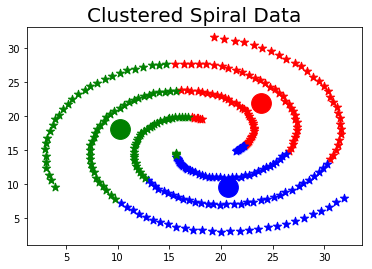

In [15]:
Kmeans.plotting_ultimateCluster(Kmeans.ultimate_cluster())

####  Hierarchical Clustering Algorithm 

In [16]:
def hierarchical_clustering_Algorithm(spiralData, Linkage, clusterNumbers):  
    
    listofIndex = []
    
    clr = 0
    
    colors = [ 'red', 'blue', 'green', 'black', 'purple','magenta', 'orange', 'yellow','cyan']
     
    # Compute the distance b/w points in space:-
    ComputedDistance = pairwise_distances(spiralData, metric='euclidean')
       
    # Distance Matrix:-
    np.fill_diagonal(ComputedDistance, sys.maxsize)
    
    #Compute Clusters:-
    ClustersFormed = Compute_Clusters(ComputedDistance, Linkage) 
    
    # Plot the clusters:-
    itrn = ComputedDistance.shape[0] - clusterNumbers
    
    pltClusters = ClustersFormed[itrn]
    
    arrayofClusters = np.unique(pltClusters)
    
   
    fig = plt.figure()
    
    fig.suptitle('Clustered Spiral Data Using Euclidean Distance', fontdict = {'fontsize':20,'fontweight':5})
    
    for clstr in np.nditer(arrayofClusters):
        
        listofIndex.append( np.where ( pltClusters == clstr ))
    
            
    for index in range(0,len(listofIndex)):
        
        for k in np.nditer(listofIndex[index]):
            
               plt.scatter(spiralData[k,0],spiralData[k,1], c = colors[clr])
                
        clr +=1
        
    plt.show()

In [17]:
def Compute_Clusters( input, Linkage):
    
    distantMat = []
    Cluster = {}
    row,column = -1,-1
    
    
    for p in range(input.shape[0]):
        distantMat.append(p)
        
    Cluster[0] = distantMat.copy()

    #Compute minimum value from the distance matrix:-
    for q in range(1, input.shape[0]):
        miniValue = sys.maxsize
        
        for r in range(0, input.shape[0]):
            for s in range(0, input.shape[1]):
                if(input[r][s] <= miniValue):
                    miniValue = input[r][s]
                    row = r
                    column = s
        
        # Update Distance Matrix
        # Using Single Linkage
        if(Linkage == "single" or Linkage == "Single"):
            for r in range(0,input.shape[0]):
                if(r != column):
                                                         
                    distanceMatrix = min(input[column][r],input[row][r])
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
       
        
        # Complete Linkage
        elif( Linkage == "Complete" or Linkage == "complete"):
             for r in range(0,input.shape[0]):
                if(r != column and r!=row):
                    distanceMatrix = min(input[column][r],input[row][r])
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        # Average Linkage
        elif(Linkage == "Average" or Linkage == "average"):
             for r in range(0,input.shape[0]):
                if(r != column and r!=row):
                    distanceMatrix = (input[column][r] + input[row][r])/2
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        elif( Linkage == "Centroid" or Linkage == "centroid"):
            for r in range(0,input.shape[0]):
                if(r != column and r != row):
                    distanceFromCentroid = computeCentroidDistance(r,row,column)
                    input[column][r] = distanceFromCentroid
                    input[r][column] = distanceFromCentroid
                   
        #Updates rows and columns 4 cluster with higher index

        for r in range (0,input.shape[0]):
            input[row][r] = sys.maxsize
            input[r][row] = sys.maxsize
            
        minimum = min(row,column)
        maximum = max(row,column)
        
        for p in range(len(distantMat)):
            if(distantMat[p] == maximum):
                distantMat[p] = minimum
        Cluster[q] = distantMat.copy()
        
    return Cluster

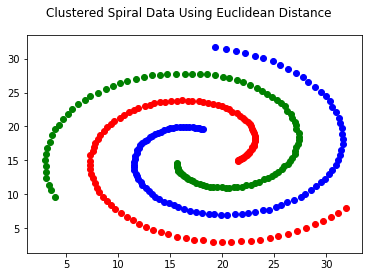

In [18]:
hierarchical_clustering_Algorithm(spiral_dataValues,"single",3)

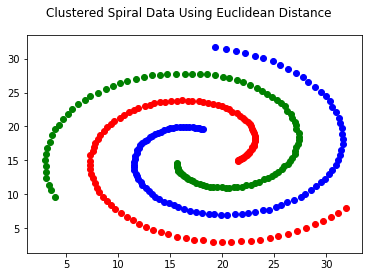

In [19]:
hierarchical_clustering_Algorithm(spiral_dataValues, "Complete", 3)

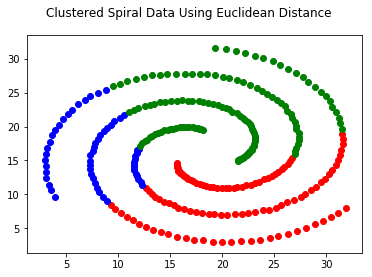

In [20]:
hierarchical_clustering_Algorithm(spiral_dataValues, "Average", 3)

####  Plot Dendrogram for each Hierarchical Clustering

#### Ward Linkage

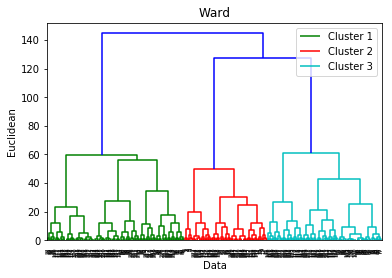

In [21]:
dendro_L2_ward = sch.dendrogram(sch.linkage(spiral_dataValues, method='ward'))
plt.title('Ward')
plt.xlabel("Data")
plt.ylabel("Euclidean")
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

#### Complete Linkage 

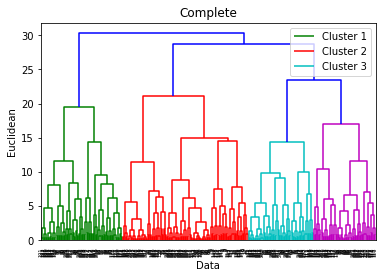

In [22]:
dendro_L2_complete = sch.dendrogram(sch.linkage(spiral_dataValues, method='complete'))
plt.title('Complete')
plt.xlabel("Data")
plt.ylabel("Euclidean")
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()


#### Average Linkage 

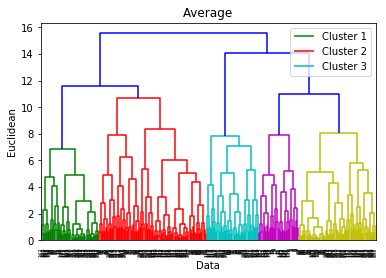

In [23]:
dendro_L2_average = sch.dendrogram(sch.linkage(spiral_dataValues, method = 'average'))
plt.title('Average')
plt.xlabel("Data")
plt.ylabel("Euclidean")
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

#### Single Linkage 

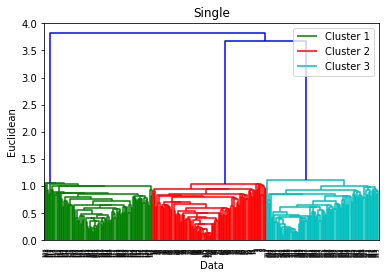

In [24]:
dendro_L2_single = sch.dendrogram(sch.linkage(spiral_dataValues, method='single'))
plt.title('Single')
plt.xlabel("Data")
plt.ylabel("Euclidean")
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

####  Considering Cosine Instead of Euclidean

In [25]:
def hierarchical_clustering_Algorithm(spiralData, Linkage, clusterNumbers): 
    
    listofIndex = []
    
    clr = 0

    colors = [ 'red', 'blue', 'green', 'black', 'purple','magenta', 'orange', 'yellow','cyan']
    
    # Compute the distance b/w points in space:-
    ComputedDistance = pairwise_distances(spiralData, metric='cosine')
    
    # Distance Matrix:-
    np.fill_diagonal(ComputedDistance, sys.maxsize)
    
    #Compute Clusters:-
    ClustersFormed = Compute_Clusters(ComputedDistance, Linkage) 
    
    # Plot the clusters:-
    itrn = ComputedDistance.shape[0] - clusterNumbers
    
    pltClusters = ClustersFormed[itrn]
    
    arrayofClusters = np.unique(pltClusters)
    
    fig = plt.figure()
    
    fig.suptitle('Clustered Spiral Data Using Cosine', fontdict = {'fontsize':20,'fontweight':5})
    
    for clstr in np.nditer(arrayofClusters):
        
        listofIndex.append( np.where ( pltClusters == clstr ))
        
    for index in range(0,len(listofIndex)):
        
        for k in np.nditer(listofIndex[index]):
            
               plt.scatter(spiralData[k,0],spiralData[k,1], c = colors[clr])
                
        clr +=1
        
    plt.show()

In [26]:
def Compute_Clusters( input, Linkage):
    
    distantMat = []
    Cluster = {}
    row,column = -1,-1
    
    
    for p in range(input.shape[0]):
        distantMat.append(p)
        
    Cluster[0] = distantMat.copy()

    #Compute minimum value from the distance matrix:-
    for q in range(1, input.shape[0]):
        miniValue = sys.maxsize
        
        for r in range(0, input.shape[0]):
            for s in range(0, input.shape[1]):
                if(input[r][s] <= miniValue):
                    miniValue = input[r][s]
                    row = r
                    column = s
        
        # Update Distance Matrix
        # Using Single Linkage
        if(Linkage == "single" or Linkage == "Single"):
            for r in range(0,input.shape[0]):
                if(r != column):
                                                         
                    distanceMatrix = min(input[column][r],input[row][r])
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        # Complete Linkage
        elif( Linkage == "Complete" or Linkage == "complete"):
             for r in range(0,input.shape[0]):
                if(r != column and r!=row):
                    distanceMatrix = min(input[column][r],input[row][r])
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        # Average Linkage
        elif(Linkage == "Average" or Linkage == "average"):
             for r in range(0,input.shape[0]):
                if(r != column and r!=row):
                    distanceMatrix = (input[column][r] + input[row][r])/2
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        elif( Linkage == "Centroid" or Linkage == "centroid"):
            for r in range(0,input.shape[0]):
                if(r != column and r != row):
                    distanceFromCentroid = computeCentroidDistance(r,row,column)
                    input[column][r] = distanceFromCentroid
                    input[r][column] = distanceFromCentroid
                   
        #Updates rows and columns 4 cluster with higher index

        for r in range (0,input.shape[0]):
            input[row][r] = sys.maxsize
            input[r][row] = sys.maxsize
            
        minimum = min(row,column)
        maximum = max(row,column)
        
        for p in range(len(distantMat)):
            if(distantMat[p] == maximum):
                distantMat[p] = minimum
        Cluster[q] = distantMat.copy()
        
    return Cluster

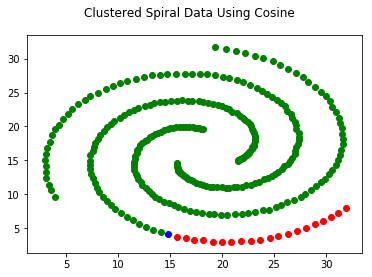

In [27]:
hierarchical_clustering_Algorithm(spiral_dataValues,"single",3)

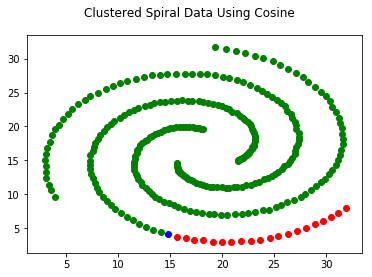

In [28]:
hierarchical_clustering_Algorithm(spiral_dataValues, "Complete", 3)

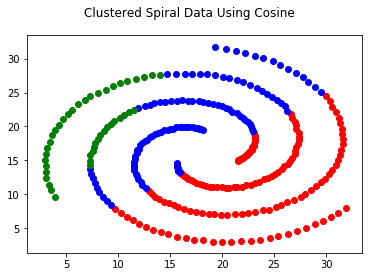

In [29]:
hierarchical_clustering_Algorithm(spiral_dataValues, "Average", 3)

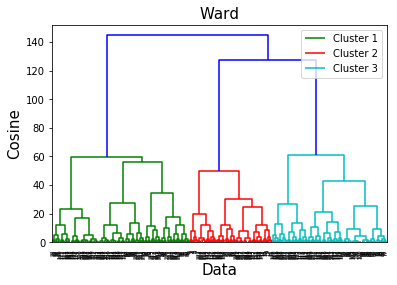

In [30]:
dendro_Cosine_ward = sch.dendrogram(sch.linkage(spiral_dataValues, method='ward'))
plt.title('Ward', size = 15)
plt.xlabel("Data", size = 15)
plt.ylabel("Cosine", size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

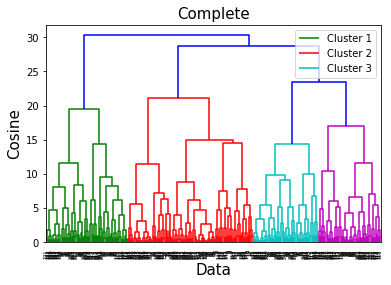

In [31]:
dendro_Cosine_Complete = sch.dendrogram(sch.linkage(spiral_dataValues, method='complete'))
plt.title('Complete',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("Cosine",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()


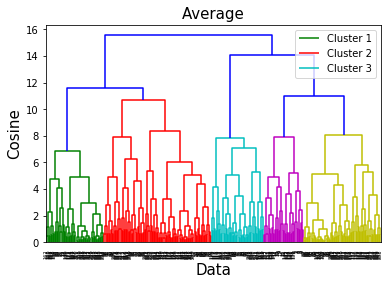

In [32]:
dendro_Cosine_Avg = sch.dendrogram(sch.linkage(spiral_dataValues, method = 'average'))
plt.title('Average',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("Cosine",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

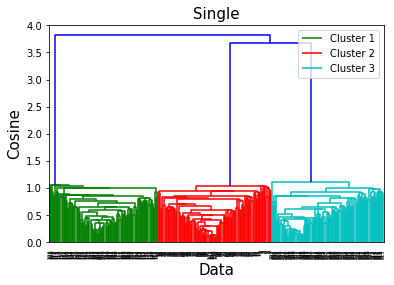

In [33]:
dendro_Cosine_Single = sch.dendrogram(sch.linkage(spiral_dataValues, method='single'))
plt.title('Single',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("Cosine",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

#### Considering L3 Distance

In [34]:
def hierarchical_clustering_Algorithm(spiralData, Linkage, clusterNumbers):  
    
    listofIndex = []
    
    clr = 0

    colors = [ 'red', 'blue', 'green', 'black', 'purple','magenta', 'orange', 'yellow','cyan']
    
    # Compute the distance b/w points in space:-
    ComputedDistance = pairwise_distances(spiralData, metric='minkowski')
    
    # Distance Matrix:-
    np.fill_diagonal(ComputedDistance, sys.maxsize)
    
    #Compute Clusters:-
    ClustersFormed = Compute_Clusters(ComputedDistance, Linkage) 
    
    # Plot the clusters:-
    itrn = ComputedDistance.shape[0] - clusterNumbers
    
    pltClusters = ClustersFormed[itrn]
    
    arrayofClusters = np.unique(pltClusters)
    
    fig = plt.figure()
    
    fig.suptitle('Clustered Spiral Data using L3 Distance', fontdict = {'fontsize':20,'fontweight':5})
    
    for clstr in np.nditer(arrayofClusters):
        
        listofIndex.append( np.where ( pltClusters == clstr ))
        
    for index in range(0,len(listofIndex)):
        
        for k in np.nditer(listofIndex[index]):
            
               plt.scatter(spiralData[k,0],spiralData[k,1], c = colors[clr])
                
        clr +=1
        
    plt.show()

In [35]:
def Compute_Clusters( input, Linkage):
    
    distantMat = []
    Cluster = {}
    row,column = -1,-1
    
    
    for p in range(input.shape[0]):
        distantMat.append(p)
        
    Cluster[0] = distantMat.copy()

    #Compute minimum value from the distance matrix:-
    for q in range(1, input.shape[0]):
        miniValue = sys.maxsize
        
        for r in range(0, input.shape[0]):
            for s in range(0, input.shape[1]):
                if(input[r][s] <= miniValue):
                    miniValue = input[r][s]
                    row = r
                    column = s
        
        # Update Distance Matrix
        # Using Single Linkage
        if(Linkage == "single" or Linkage == "Single"):
            for r in range(0,input.shape[0]):
                if(r != column):
                                                         
                    distanceMatrix = min(input[column][r],input[row][r])
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        # Complete Linkage
        elif( Linkage == "Complete" or Linkage == "complete"):
             for r in range(0,input.shape[0]):
                if(r != column and r!=row):
                    distanceMatrix = min(input[column][r],input[row][r])
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        # Average Linkage
        elif(Linkage == "Average" or Linkage == "average"):
             for r in range(0,input.shape[0]):
                if(r != column and r!=row):
                    distanceMatrix = (input[column][r] + input[row][r])/2
                    input[column][r] = distanceMatrix
                    input[r][column] = distanceMatrix
        
        elif( Linkage == "Centroid" or Linkage == "centroid"):
            for r in range(0,input.shape[0]):
                if(r != column and r != row):
                    distanceFromCentroid = computeCentroidDistance(r,row,column)
                    input[column][r] = distanceFromCentroid
                    input[r][column] = distanceFromCentroid
                   
        #Updates rows and columns 4 cluster with higher index

        for r in range (0,input.shape[0]):
            input[row][r] = sys.maxsize
            input[r][row] = sys.maxsize
            
        minimum = min(row,column)
        maximum = max(row,column)
        
        for p in range(len(distantMat)):
            if(distantMat[p] == maximum):
                distantMat[p] = minimum
        Cluster[q] = distantMat.copy()
        
    return Cluster

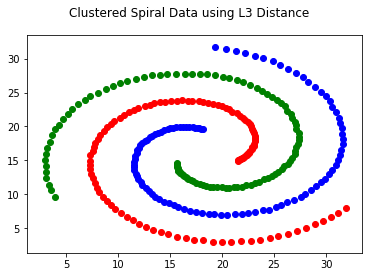

In [36]:
hierarchical_clustering_Algorithm(spiral_dataValues,"single",3)

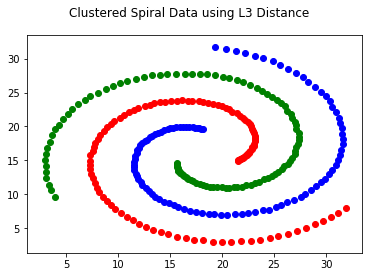

In [37]:
hierarchical_clustering_Algorithm(spiral_dataValues, "Complete", 3)

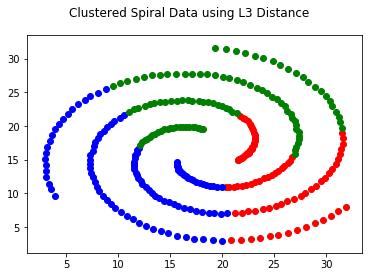

In [38]:
hierarchical_clustering_Algorithm(spiral_dataValues, "Average", 3)

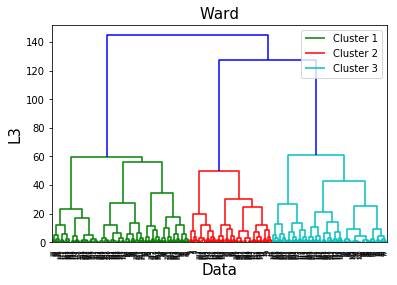

In [39]:
dendro_L3_ward = sch.dendrogram(sch.linkage(spiral_dataValues, method='ward'))
plt.title('Ward',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("L3",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

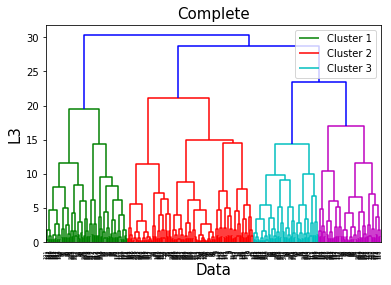

In [40]:
dendro_L3_complete = sch.dendrogram(sch.linkage(spiral_dataValues, method='complete'))
plt.title('Complete',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("L3",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()


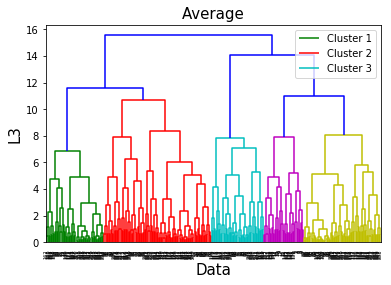

In [41]:
dendro_L3_Avg= sch.dendrogram(sch.linkage(spiral_dataValues, method = 'average'))
plt.title('Average',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("L3",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()

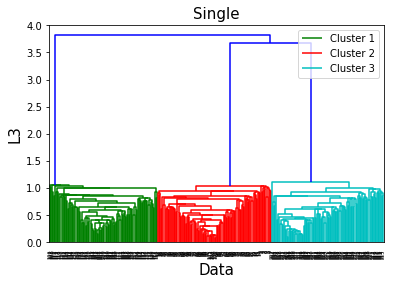

In [42]:
dendro_L3_Single = sch.dendrogram(sch.linkage(spiral_dataValues, method='single'))
plt.title('Single',size = 15)
plt.xlabel("Data",size = 15)
plt.ylabel("L3",size = 15)
plt.legend(['Cluster 1','Cluster 2','Cluster 3'])
plt.show()